### Python Advanced concepts  2021 1230 CJH
* Mainly taken from Real Python (https://realpython.com/) - search for the examples for more in-depth explanations
---

### python libraries
* math, date, time - all bultins
* regex - find patterns in strings
* numpy - fast computation on arrays
* matplotlib - incredibly versatile plotting
* pandas - the go-to data science library

### lambdas (aka anonymous functions)
* a time saving device for returning an in-line function
* you define it where you use it
* so it's a perfect device for a function that you only use once
* also common in functions that require functions as input (like when you bind actions to a joystick button)

In [1]:
# standard function definition
def sum(a,b):
    return a + b

sum(3, 7)

10

In [2]:
# a lambda definition is a bit different
lsum = lambda x,y : x + y

lsum(3, 8)

11

In [3]:
# immediately invoked function expression  (IIFE)
# rarely used this way
(lambda x, y: x + y)(2, 3)

5

In [4]:
# an actual use - pass a different sorting function to python's sorted() list operation
sorted?

Signature: sorted(iterable, /, *, key=None, reverse=False)
Docstring:
Return a new list containing all items from the iterable in ascending order.

A custom key function can be supplied to customize the sort order, and the
reverse flag can be set to request the result in descending order.
Type:      builtin_function_or_method


In [5]:
# by default it just sorts in ascending order on the value given
sorted([1, 2, 3, 4, 5, 6, 7, 8, 9])

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
sorted([1, 2, 3, 4, 5, 6, 7, 8, 9], key=lambda x: -x)  # actually, you could have just said reverse=True

[9, 8, 7, 6, 5, 4, 3, 2, 1]

In [7]:
# here is a wacky one
sorted([1, 2, 3, 4, 5, 6, 7, 8, 9], key=lambda x: abs(5-x))

[5, 4, 6, 3, 7, 2, 8, 1, 9]

---
### args and kwargs
* Python has an unpacking operators `(*)` and `(**)`
* you can use them in function defintions and when you call functions
* examples from https://realpython.com/python-kwargs-and-args/

In [8]:
# sum_integers_list.py
def my_sum(my_integers):
    result = 0
    for x in my_integers:
        result += x
    return result

list_of_integers = [1, 2, 3]
print(my_sum(list_of_integers))

6


### instead, you could have your function look at every *unnamed* argument passed to it with the * operator
* for example, define it with `*args` and your function now has an iterator `args` you can loop over

In [9]:
# sum_integers_args.py
def my_sum(*args):
    result = 0
    # Iterating over the Python args tuple
    for x in args:
        result += x
    return result

print(my_sum(1, 2, 3))

6


### instead, you could have your function look at every *named* argument passed to it with the ** operator
* for example, define it with `**kwargs` and your function now has an dictionary `kwargs` you can iterate over
* note, however, when you iterate over a dictionary you get the keys, so use kwargs.values() or kwargs.keys() when you loop

In [10]:
# concatenate.py
def concatenate(**kwargs):
    result = ""
    # Iterating over the Python kwargs dictionary
    for arg in kwargs.values():
        result += arg
    return result

print(concatenate(a="Real", b="Python", c="Is", d="Great", e="!"))

RealPythonIsGreat!


### putting them all together has a specific order

In [11]:
# correct_function_definition.py
def my_function(a, b, *args, **kwargs):
    pass

### super quick look at pandas

In [12]:
import pandas as pd

In [ ]:
#!pip install pandas

In [50]:
url = 'https://en.wikipedia.org/wiki/World_population'

In [98]:
pop_tables = pd.read_html(url)
pop_table = pop_tables[4]

In [99]:
#!pip install lxml

In [100]:
pop_table

,Rank,Country,Population,% of world,Date,Source(official or UN)
0,1,China,1413617120,NaN,9 Jun 2022,National population clock[92]
1,2,India,1378988500,NaN,9 Jun 2022,National population clock[93]
2,3,United States,332755331,NaN,9 Jun 2022,National population clock[94]
3,4,Indonesia,269603400,NaN,1 Jul 2020,National annual projection[95]
4,5,Pakistan,220892331,NaN,1 Jul 2020,UN Projection[96]
5,6,Brazil,214737316,NaN,9 Jun 2022,National population clock[97]
6,7,Nigeria,206139587,NaN,1 Jul 2020,UN Projection[96]
7,8,Bangladesh,172861468,NaN,9 Jun 2022,National population clock[98]
8,9,Russia,146748590,NaN,1 Jan 2020,National annual estimate[99]
9,10,Mexico,127792286,NaN,1 Jul 2020,National annual projection[100]


In [101]:
pop_table.columns

Index(['Rank', 'Country', 'Population', '% of world', 'Date',
       'Source(official or UN)'],
      dtype='object')

In [102]:
pop_table['Population_Mil'] = pop_table['Population']/1E6

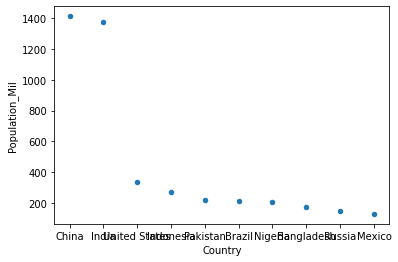

In [112]:
ax = pop_table.plot.scatter('Country','Population_Mil')

In [108]:
import matplotlib.pyplot as plt

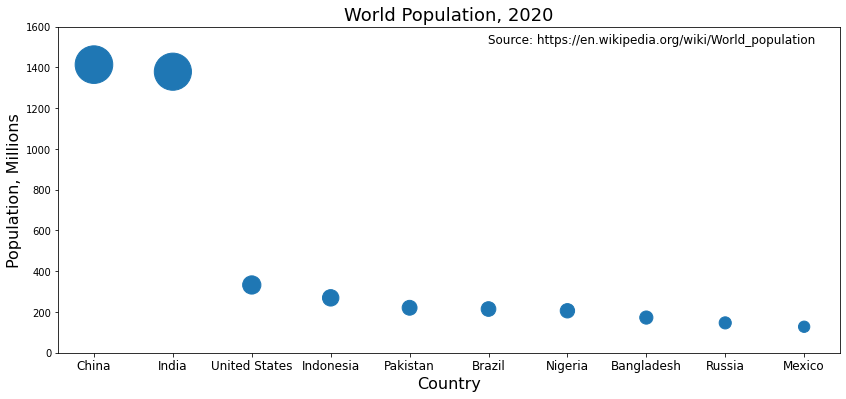

In [143]:
fig, ax = plt.subplots(1,1, figsize = (14,6))
fontsize = 18
pop_table.plot.scatter(x='Country',y='Population_Mil', s='Population_Mil', ax=ax)
ax.set_title(f'World Population, 2020', fontsize=fontsize)
ax.annotate(f'Source: {url}', xy=(1, 1), xytext=(0.55, 0.95), textcoords='axes fraction', fontsize=12)
ax.set_xlabel('Country',  fontsize=fontsize-2)
ax.tick_params(axis='x', labelsize=12)
ax.set_ylabel('Population, Millions', fontsize=fontsize-2)
ax.set_ylim([0,1600])
plt.show()
